# Project: Linear Regression
## Name: Benjamin Nguyen
This Jupyter Notebook Starter File provides a basic outline for your solutions. For detailed instructions, please refer to the assignment on Canvas. Complete all your work for this project in this same Jupyter Notebook file, which you will submit:
- Code:
  - Insert your code where you see #Insert Code Here.
  - Ensure all code is well-commented and easy to understand.
  - Use clear and descriptive variable names.
- Questions:
  - You will be provided guided questions in a separate assignment vs. here in the code to give you the opportunity to demonstrate a deep understanding of the concepts through thorough explanations and critical thinking.

In [1]:
#Example of supress warnings for Numpy version out of range (optional)
import warnings
warnings.filterwarnings("ignore", category=Warning)
warnings.simplefilter(action='ignore', category=FutureWarning)

#Some recommended libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import zipfile
import requests
from io import BytesIO
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import matplotlib.dates as mdates

# The Dataset

In [2]:
# URL of the Bike Sharing Dataset zip file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"

# Fetch the zip file from the URL
response = requests.get(url)
zip_file = zipfile.ZipFile(BytesIO(response.content))

# List files in the zip
print(zip_file.namelist())

# Load the day.csv file into a DataFrame
with zip_file.open('day.csv') as file:
    df = pd.read_csv(file)
    print(df.head())

['Readme.txt', 'day.csv', 'hour.csv']
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562 

In [3]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


# Data Preprocessing 

In [4]:
#Insert Code Here

print(df.shape)
print(df.columns)
print(df.describe())


(731, 16)
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp

In [5]:
missing_counts = df.isnull().sum()
print("Missing values per column:\n", missing_counts)

Missing values per column:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


## Data interpretation:

- **season**: season of the year  
  - 1 = spring  
  - 2 = summer  
  - 3 = fall  
  - 4 = winter  

- **yr**: year  
  - 0 = 2011  
  - 1 = 2012  

- **mnth**: month  
  - 1 = January  
  - 2 = February  
  - …  
  - 12 = December  

- **holiday**: whether the day is a holiday  
  - 0 = not a holiday  
  - 1 = holiday  

- **weekday**: day of the week  
  - 0 = Sunday  
  - 1 = Monday  
  - …  
  - 6 = Saturday  

- **workingday**: whether the day is a working day (not weekend/holiday)  
  - 0 = weekend or holiday  
  - 1 = working day  

- **weathersit**: weather situation (4 levels: 1, 2, 3, 4) 



In [6]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


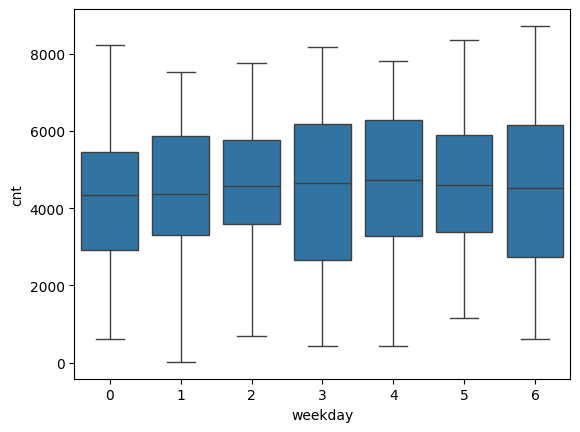

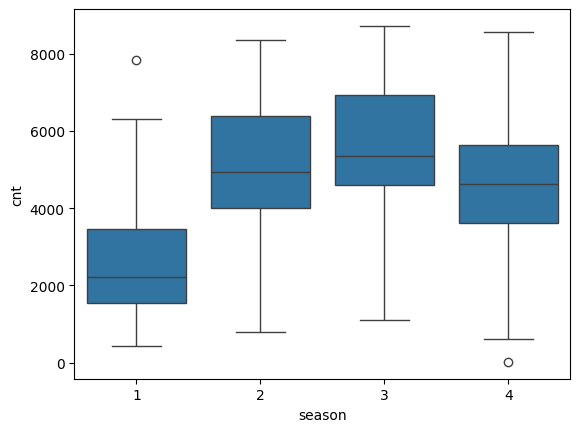

<Figure size 640x480 with 0 Axes>

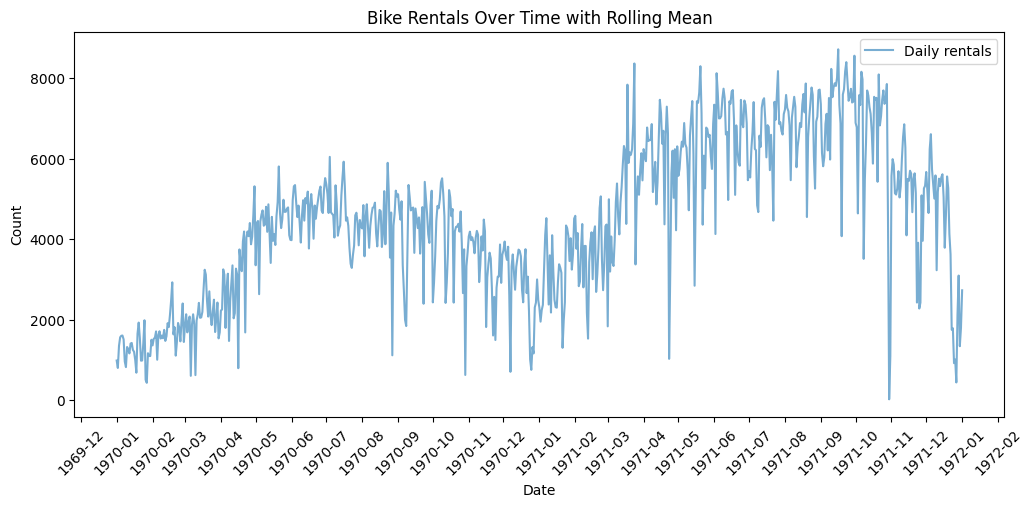

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


# Rentals per weekday
sns.boxplot(x='weekday', y='cnt', data=df)
plt.figure()
# Seasonal patterns
sns.boxplot(x='season', y='cnt', data=df)
plt.figure()


plt.figure(figsize=(12,5))

# Daily counts
plt.plot(df['dteday'], df['cnt'], alpha=0.6, label="Daily rentals")


# Formatting
plt.title("Bike Rentals Over Time with Rolling Mean")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()

# X-axis ticks monthly
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.show()

In [8]:
# Drop ID, date, and leakage columns
df_model = df.drop(['instant', 'dteday', 'casual', 'registered', 'cnt'], axis=1)
y = df['cnt']

# One-hot encode categorical variables
df_model = pd.get_dummies(
    df_model,
    columns=['season', 'weathersit', 'mnth', 'weekday'],
    drop_first=True  # avoid dummy trap
)

In [9]:
df_model

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,0.344167,0.363625,0.805833,0.160446,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,0,0,0,0.363478,0.353739,0.696087,0.248539,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,0,1,0.196364,0.189405,0.437273,0.248309,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0,0,1,0.200000,0.212122,0.590435,0.160296,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,0,0,1,0.226957,0.229270,0.436957,0.186900,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,0,1,0.254167,0.226642,0.652917,0.350133,False,False,False,...,False,False,False,True,False,False,False,True,False,False
727,1,0,1,0.253333,0.255046,0.590000,0.155471,False,False,False,...,False,False,False,True,False,False,False,False,True,False
728,1,0,0,0.253333,0.242400,0.752917,0.124383,False,False,False,...,False,False,False,True,False,False,False,False,False,True
729,1,0,0,0.255833,0.231700,0.483333,0.350754,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [10]:
# Features (X)
X = df_model

# Scale features for linear regression / NN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Shape of X:", X.shape)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Shape of X: (731, 29)
Train shape: (584, 29) Test shape: (147, 29)


In [11]:
X_scaled

array([[-1.00136893, -0.171981  , -1.47122472, ..., -0.40727045,
        -0.40727045,  2.4417012 ],
       [-1.00136893, -0.171981  , -1.47122472, ..., -0.40727045,
        -0.40727045, -0.40955052],
       [-1.00136893, -0.171981  ,  0.67970582, ..., -0.40727045,
        -0.40727045, -0.40955052],
       ...,
       [ 0.99863295, -0.171981  , -1.47122472, ..., -0.40727045,
        -0.40727045,  2.4417012 ],
       [ 0.99863295, -0.171981  , -1.47122472, ..., -0.40727045,
        -0.40727045, -0.40955052],
       [ 0.99863295, -0.171981  ,  0.67970582, ..., -0.40727045,
        -0.40727045, -0.40955052]], shape=(731, 29))

# Building the Linear Regression Model

In [12]:
#Insert Code Here
# Initialize model
lin_reg = LinearRegression(fit_intercept=True)

# Fit model on training data
lin_reg.fit(X_train, y_train)

# Print coefficients and intercept
print("Intercept:", lin_reg.intercept_)
print("Number of coefficients:", len(lin_reg.coef_))


Intercept: 4509.328088032111
Number of coefficients: 29


# Evaluating the Model

Train
MAE : 548.18
MSE : 561,395.12
RMSE: 749.26
R^2 : 0.8469

Test
MAE : 583.02
MSE : 634,351.36
RMSE: 796.46
R^2 : 0.8418



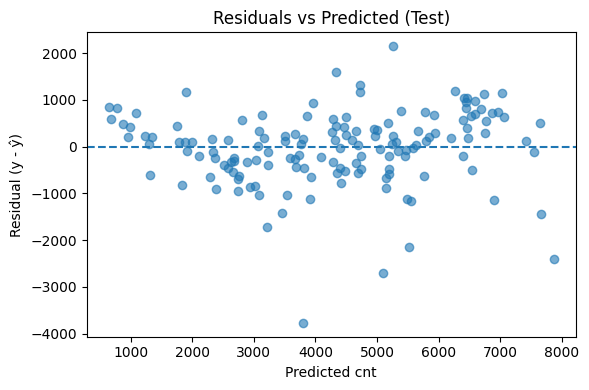

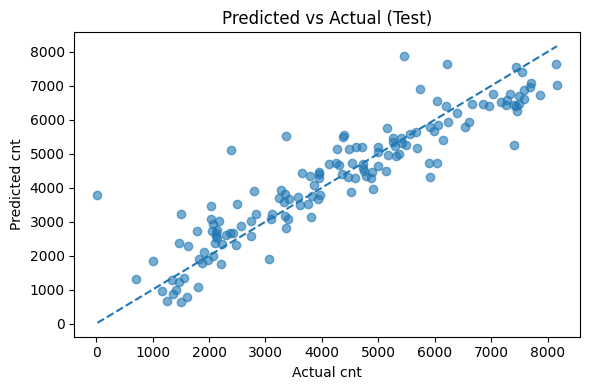

In [13]:
#Insert Code Here
# ---- Predictions ----
y_pred_train = lin_reg.predict(X_train)
y_pred_test  = lin_reg.predict(X_test)

def report_metrics(y_true, y_pred, name="Set"):
    mae  = mean_absolute_error(y_true, y_pred)
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_true, y_pred)
    print(f"{name}")
    print(f"MAE : {mae:,.2f}")
    print(f"MSE : {mse:,.2f}")
    print(f"RMSE: {rmse:,.2f}")
    print(f"R^2 : {r2:,.4f}\n")

report_metrics(y_train, y_pred_train, "Train")
report_metrics(y_test,  y_pred_test,  "Test")

residuals = y_test - y_pred_test
plt.figure(figsize=(6,4))
plt.scatter(y_pred_test, residuals, alpha=0.6)
plt.axhline(0, linestyle="--")
plt.title("Residuals vs Predicted (Test)")
plt.xlabel("Predicted cnt")
plt.ylabel("Residual (y - ŷ)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_test, alpha=0.6)
lims = [min(y_test.min(), y_pred_test.min()), max(y_test.max(), y_pred_test.max())]
plt.plot(lims, lims, "--")
plt.title("Predicted vs Actual (Test)")
plt.xlabel("Actual cnt")
plt.ylabel("Predicted cnt")
plt.tight_layout()
plt.show()

## For the Model Selection Project, you will STOP HERE! 
During Units 4, 5, and 6, we will explore and learn additional techniques, and then revisit these projects to apply the below:
- Model evaluation discussion and parameter tuning
- Explanatory visualizations and package your results with data storytelling

# Tuning Model Parameters (Completed in Unit 4)

In [14]:
#Insert Code Here

# Evaluating the Tuned Model (Completed in Unit 4)

In [15]:
#Insert Code Here

# Visualizing Results (Completed in Units 4 and 6)

In [16]:
#Insert Code Here